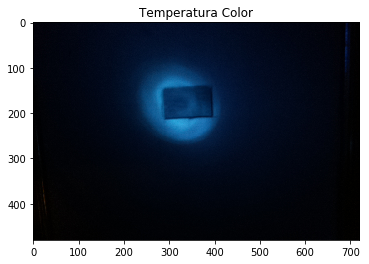

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import io
import time
import picamera
import cv2
import numpy as np

# Create the in-memory stream
stream = io.BytesIO()
with picamera.PiCamera() as camera:
    camera.start_preview()
    time.sleep(2)
    camera.capture(stream, format='jpeg')
# Construct a numpy array from the stream
data = np.frombuffer(stream.getvalue(), dtype=np.uint8)
# "Decode" the image from the array, preserving colour
image = cv2.imdecode(data, 1)
# OpenCV returns an array with data in BGR order. If you want RGB instead
# use the following...
image = image[:, :, ::-1]

plt.imshow(image)
plt.title('Temperatura Color')
plt.show()


In [4]:
r=image[:,:,0]
g=image[:,:,1]
b=image[:,:,2]

rp = r.sum()/(r.shape[0]*r.shape[1])
gp = g.sum()/(g.shape[0]*g.shape[1])
bp = b.sum()/(b.shape[0]*b.shape[1])

rp,gp,bp

(2.743003472222222, 11.964157986111111, 26.97335358796296)

In [5]:
import numpy as np
import colour

# Assuming sRGB encoded colour values.
RGB = np.array([rp,gp,bp])


# Conversion to tristimulus values.
XYZ = colour.sRGB_to_XYZ(RGB / 255)

# Conversion to chromaticity coordinates.
xy = colour.XYZ_to_xy(XYZ)

# Conversion to correlated colour temperature in K.
CCT = colour.temperature.xy_to_CCT_Hernandez1999(xy)
print(CCT)

3.881999928883711e+93
